In [4]:
from skimage import feature
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [5]:
data = np.load("cropped_data.npy")
data.shape

(213, 342, 100, 100)

In [6]:
avgDP = np.average(data, axis = (0,1))
avgImg = np.average(data, axis = (2,3))

# Steps to create Virtual Reconstructions

1. Find the center of the DP
2. Create a binary mask - (1 for area to integrate, 0 for area to reject)
3. Integrate


# 1. Find the center of the DP

(1, 3) 1 [[45. 49.  3.]]


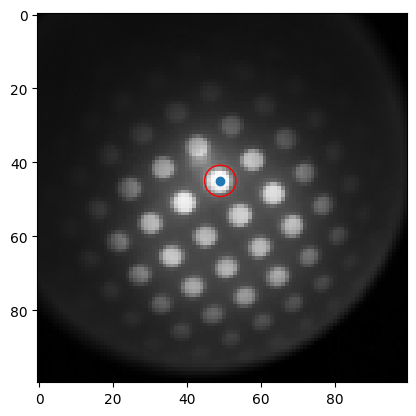

In [7]:

blob = feature.blob_log(avgDP, min_sigma = 3, max_sigma = 6, threshold = 70) # blobs give a list of tuples with center and area

print(blob.shape, len(blob), blob)

row, column, area = blob[0,:]
fig, ax = plt.subplots()
ax.imshow(avgDP, cmap = "gray")
circle = plt.Circle((column, row), radius = area*np.sqrt(2), edgecolor ="red", fill =False)
ax.add_patch(circle)
ax.scatter(column, row)
plt.show()


# 2.Create Mask

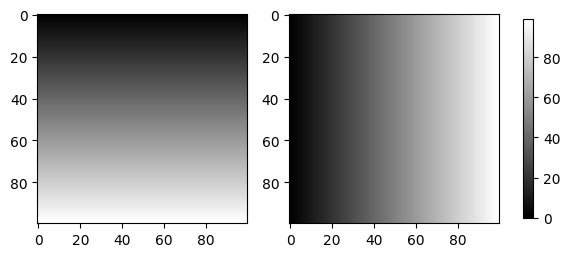

45.0 49.0


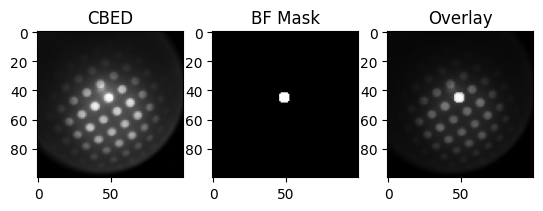

In [8]:

avgDP.shape
x, y = np.indices((avgDP.shape[0], avgDP.shape[1]))

fig, ax = plt.subplots(ncols = 2)

im0 = ax[0].imshow(x, cmap = 'gray')
im1 = ax[1].imshow(y, cmap = 'gray')

fig.colorbar(im0, ax= ax, orientation ='vertical', fraction = 0.02)
plt.show()
print(row, column)
y- column
x- row
mask_BF = (x-row)**2 + (y-column)**2 < 4**2
fig, ax = plt.subplots(ncols = 3)

ax[0].imshow(avgDP, cmap  ='gray')
ax[0].set_title("CBED")
ax[1].imshow(mask_BF, cmap = 'gray')
ax[1].set_title("BF Mask")
ax[2].imshow(avgDP, cmap = 'gray')
ax[2].imshow(mask_BF, cmap = 'gray', alpha = 0.5)
ax[2].set_title("Overlay")
plt.show()

# 3. Create BF

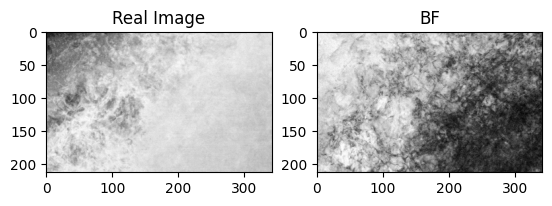

In [9]:

BF = np.zeros((avgImg.shape[0], avgImg.shape[1]))
BF
for i in range(0, avgDP.shape[0]):
    for j in range(0, avgDP.shape[1]):
        if mask_BF[i,j]:
            BF = BF + data[:,:,i,j]     #  only sum inidices that are true in the mask i.e.., that fall within the mask
        

fig, ax = plt.subplots(ncols = 2)
ax[0].imshow(avgImg, cmap ='gray')
ax[0].set_title("Real Image")
ax[1].imshow(BF, cmap = "gray")
ax[1].set_title("BF")
plt.show()

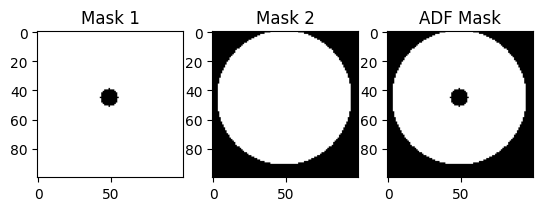

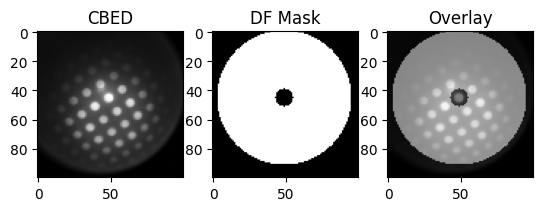

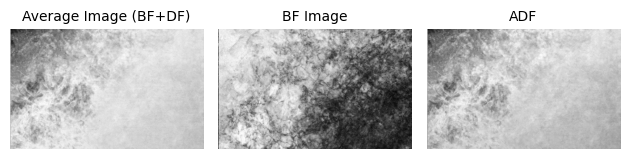

In [10]:
x, y = np.indices((avgDP.shape[0], avgDP.shape[1]))

row, column, area = blob[0,:]
mask1 = (x-row)**2 +(y-column)**2 > 6**2
mask2 = (x-row)**2 + (y-column)**2 < 46**2

ADF_mask = np.logical_and(mask1, mask2)

fig, ax = plt.subplots(ncols = 3)
ax[0].imshow(mask1, cmap ="gray")
ax[0].set_title("Mask 1")
ax[1].imshow(mask2, cmap ='gray')
ax[1].set_title("Mask 2")
ax[2].imshow(ADF_mask, cmap ="gray")
ax[2].set_title("ADF Mask")
plt.show()
fig, ax = plt.subplots(ncols =3)

ax[0].imshow(avgDP, cmap ="gray")
ax[0].set_title("CBED")
ax[1].imshow(ADF_mask, cmap ="gray")
ax[1].set_title("DF Mask")
ax[2].imshow(avgDP, cmap ="gray")
ax[2].imshow(ADF_mask, cmap ="gray", alpha = 0.5)
ax[2].set_title("Overlay")
plt.show()
ADF = np.zeros((avgImg.shape[0], avgImg.shape[1]))

for i in range(0, avgDP.shape[0]):
    for j in range(0, avgDP.shape[1]):
        if ADF_mask[i,j]:
            ADF = ADF + data[:,:,i,j]        # summ all indices in data which are true in ADF mask

fig, ax = plt.subplots(ncols =3)

ax[0].imshow(avgImg, cmap ="gray")
ax[0].set_title("Average Image (BF+DF)", fontsize = 10)
ax[0].axis("off")
ax[1].imshow(BF, cmap ="gray")
ax[1].set_title("BF Image", fontsize = 10)
ax[1].axis("off")
ax[2].imshow(ADF, cmap ="gray")
ax[2].set_title("ADF", fontsize = 10)
ax[2].axis("off")
plt.tight_layout()
plt.show()